# Morphological Transformations

- simple ops. based on **binary** image shapes

In [14]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
img = cv2.imread('images/smarties.png', cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)

dilation = cv2.dilate(mask, np.ones((2,2), np.uint8), iterations=2)  #blacks in white circles will be eliminated

img.shape

(356, 413)

In [81]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #opencv reads BGR format default

In [82]:
images = [img, mask, dilation]
titles = ['orginal', 'mask', 'dilation']

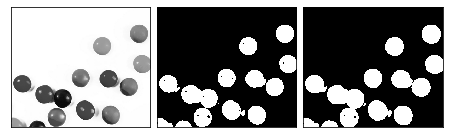

In [83]:
# basic grid adjustment
fig = plt.figure(figsize=(6, 6))


# fig.subplots_adjust(top=0.95, wspace = 0.0035, hspace=0.00000055)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.35, hspace=0.05, wspace=0.05)

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i], cmap=plt.cm.gray)

